### Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

### Bussiness Goal

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Import Dataset
train=pd.read_csv('train.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.shape 

(381109, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

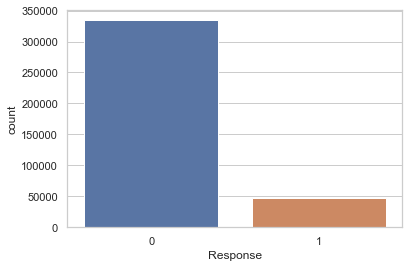

In [8]:
sns.countplot(train.Response)

In [9]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:xlabel='Age'>

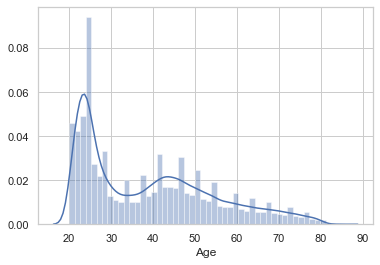

In [10]:
sns.distplot(train.Age)

<AxesSubplot:ylabel='Age'>

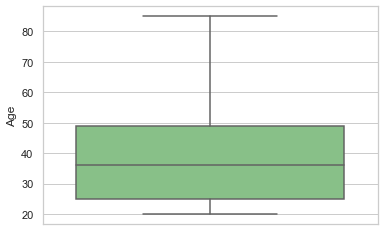

In [11]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

<AxesSubplot:xlabel='Gender', ylabel='count'>

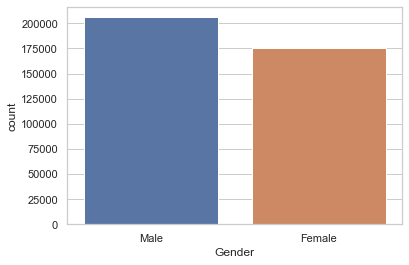

In [12]:
sns.countplot(train.Gender)

In [13]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

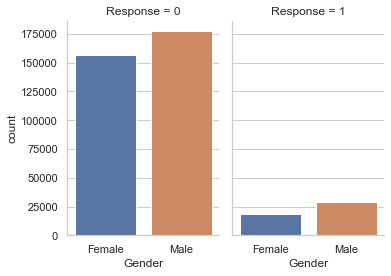

In [14]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [15]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


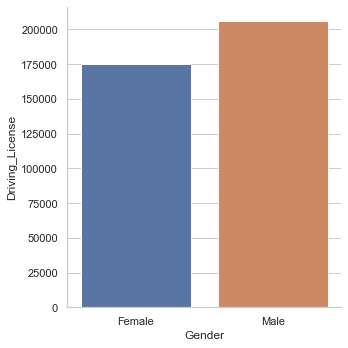

In [16]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

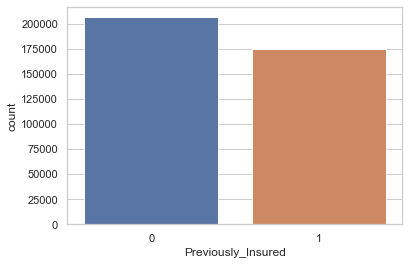

In [17]:
sns.countplot(train.Previously_Insured)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

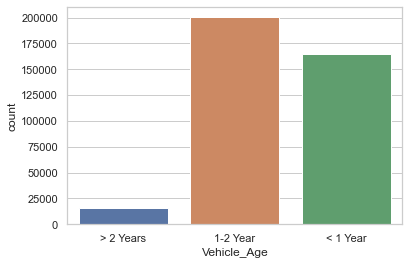

In [18]:
sns.countplot(train.Vehicle_Age)

In [19]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


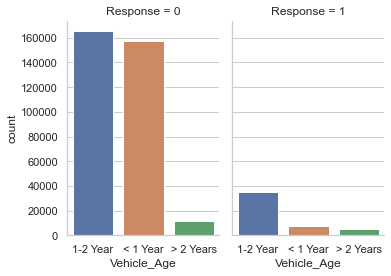

In [20]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

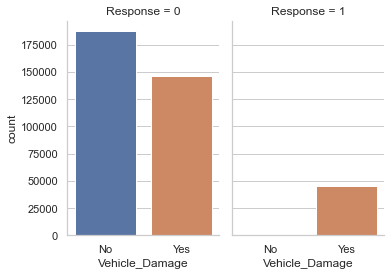

In [21]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

<AxesSubplot:xlabel='Annual_Premium'>

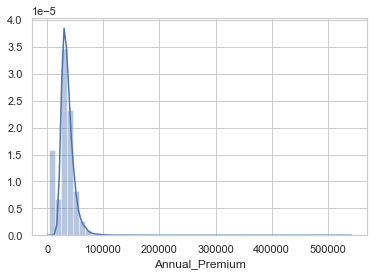

In [22]:
#Annual Premium Distribution
sns.distplot(train.Annual_Premium)

<AxesSubplot:>

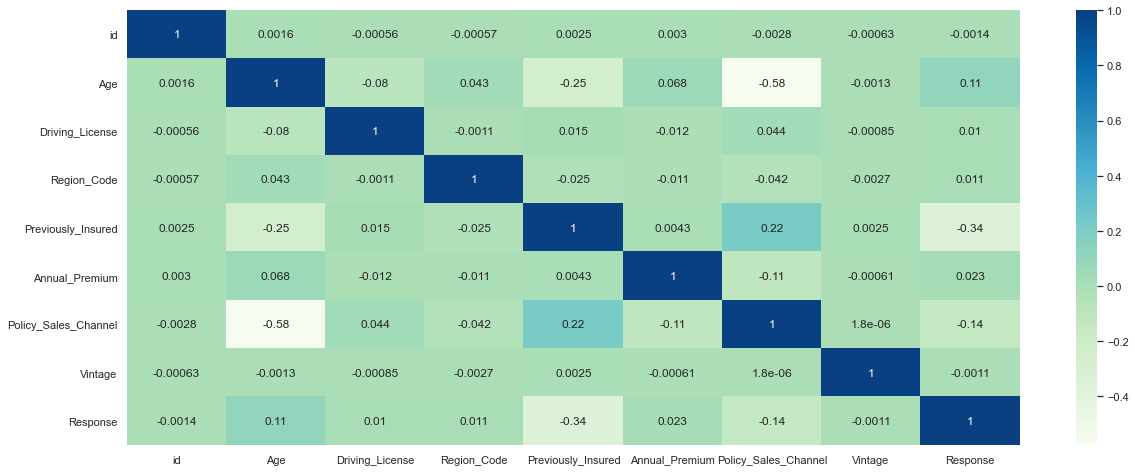

In [23]:
plt.subplots(figsize=(20,8))
sns.heatmap(train.corr(),annot=True, cmap = "GnBu")

### Data Preprocessing

In [24]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [25]:
train=pd.get_dummies(train,drop_first=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Gender                 381109 non-null  int32  
 2   Age                    381109 non-null  int64  
 3   Driving_License        381109 non-null  int64  
 4   Region_Code            381109 non-null  float64
 5   Previously_Insured     381109 non-null  int64  
 6   Annual_Premium         381109 non-null  float64
 7   Policy_Sales_Channel   381109 non-null  float64
 8   Vintage                381109 non-null  int64  
 9   Response               381109 non-null  int64  
 10  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 11  Vehicle_Age_> 2 Years  381109 non-null  uint8  
 12  Vehicle_Damage_Yes     381109 non-null  uint8  
dtypes: float64(3), int32(1), int64(6), uint8(3)
memory usage: 28.7 MB


In [27]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [28]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [29]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [31]:
train=train.drop('id',axis=1)

In [32]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285831 entries, 216376 to 305711
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  285831 non-null  int32  
 1   Age                     285831 non-null  int64  
 2   Driving_License         285831 non-null  int64  
 3   Region_Code             285831 non-null  float64
 4   Previously_Insured      285831 non-null  int64  
 5   Annual_Premium          285831 non-null  float64
 6   Policy_Sales_Channel    285831 non-null  float64
 7   Vintage                 285831 non-null  int64  
 8   Vehicle_Age_lt_1_Year   285831 non-null  int32  
 9   Vehicle_Age_gt_2_Years  285831 non-null  int32  
 10  Vehicle_Damage_Yes      285831 non-null  int32  
dtypes: float64(3), int32(4), int64(4)
memory usage: 21.8 MB


## Data Modelling and Evaluation

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,f1_score
# import packages for hyperparameters tuning
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [35]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [100]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=clf.predict(x_test)

## Classification Report


In [37]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83603
           1       0.36      0.12      0.18     11675

    accuracy                           0.87     95278
   macro avg       0.62      0.54      0.55     95278
weighted avg       0.82      0.87      0.84     95278



### ROC Curve & AUC of Random forest classifier

In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[81103  2500]
 [10297  1378]]


In [39]:
roc_auc_score(y_test, y_pred)

0.5440633727245785